In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, roc_auc_score, roc_curve,
    confusion_matrix, precision_score, recall_score, f1_score
)

In [9]:
df1 = pd.read_csv(r"D:\nirukta\college folder\Data Analyst\data\application_train_FinalEDA.csv", low_memory=False) 

In [10]:
X = df1.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df1['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:")
print(y_train.value_counts(normalize=True) * 100)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_bal.value_counts(normalize=True) * 100)


Before SMOTE:
TARGET
0    91.927092
1     8.072908
Name: proportion, dtype: float64

After SMOTE:
TARGET
0    50.0
1    50.0
Name: proportion, dtype: float64


In [11]:
print("\nShapes of datasets:")
print("X_train_bal:", X_train_bal.shape)
print("y_train_bal:", y_train_bal.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

print("\nBalanced train class counts:")
print(y_train_bal.value_counts())

print("\nTest set class distribution (%):")
print(y_test.value_counts(normalize=True) * 100)



Shapes of datasets:
X_train_bal: (452296, 55)
y_train_bal: (452296,)
X_test: (61503, 55)
y_test: (61503,)

Balanced train class counts:
TARGET
0    226148
1    226148
Name: count, dtype: int64

Test set class distribution (%):
TARGET
0    91.927223
1     8.072777
Name: proportion, dtype: float64


In [12]:
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

d:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
auc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print(f"AUC Score: {auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Model Evaluation Metrics:
Accuracy: 0.6779506690730533
AUC Score: 0.721
Precision: 0.150
Recall: 0.640
F1 Score: 0.243


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ks = max(tpr - fpr)
print(f"KS Statistic: {ks:.3f}")


KS Statistic: 0.326


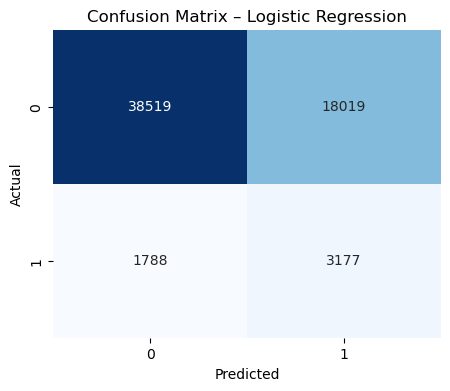

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


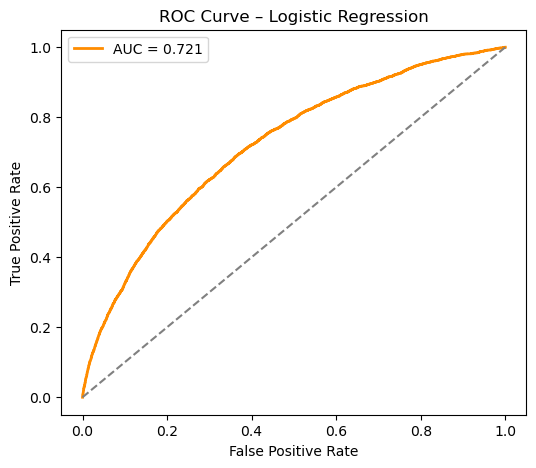

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


C:\Users\mudga\AppData\Local\Temp\ipykernel_16584\3560549304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')


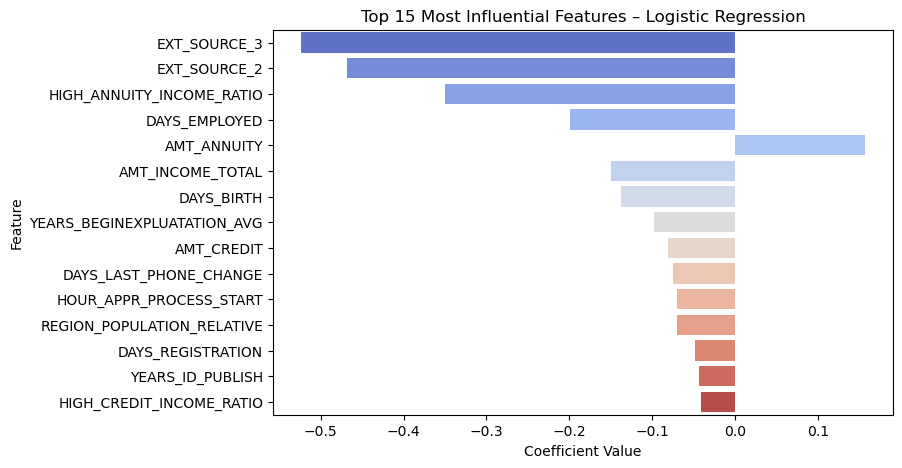

Top Predictive Features:


EXT_SOURCE_3                  -0.523767
EXT_SOURCE_2                  -0.468761
HIGH_ANNUITY_INCOME_RATIO     -0.350514
DAYS_EMPLOYED                 -0.199361
AMT_ANNUITY                    0.156480
AMT_INCOME_TOTAL              -0.150144
DAYS_BIRTH                    -0.137459
YEARS_BEGINEXPLUATATION_AVG   -0.098144
AMT_CREDIT                    -0.081093
DAYS_LAST_PHONE_CHANGE        -0.074513
HOUR_APPR_PROCESS_START       -0.069685
REGION_POPULATION_RELATIVE    -0.069547
DAYS_REGISTRATION             -0.048929
YEARS_ID_PUBLISH              -0.043942
HIGH_CREDIT_INCOME_RATIO      -0.040654
dtype: float64

In [ ]:
feature_importance = pd.Series(log_reg.coef_[0], index=X_train_bal.columns).sort_values(key=abs, ascending=False)

top_features = feature_importance.head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title("Top 15 Most Influential Features – Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

print("Top Predictive Features:")
display(top_features)


In [ ]:
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Default (0)', 'Default (1)']))


Detailed Classification Report:
                 precision    recall  f1-score   support

Non-Default (0)       0.96      0.68      0.80     56538
    Default (1)       0.15      0.64      0.24      4965

       accuracy                           0.68     61503
      macro avg       0.55      0.66      0.52     61503
   weighted avg       0.89      0.68      0.75     61503

